In [79]:
import tensorflow as tf
import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

In [80]:
# load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()



In [81]:
x_train.shape

(60000, 28, 28)

In [82]:
x_train.ndim

3

In [83]:
# expand 3 dimention data to 4 dimension

if x_train.ndim == 3:  # missing channel dimension
    x_train = x_train[..., tf.newaxis]

if x_test.ndim == 3:  # missing channel dimension
    x_test = x_test[..., tf.newaxis]


In [84]:
x_train.ndim
x_test.ndim

4

In [85]:
x_train.shape

(60000, 28, 28, 1)

In [86]:
# reshape the data to add a channel dimension
# division by 255 scales the values in the range of [0, 1]

# resize image into 32*32
x_train = tf.image.resize(x_train, (32, 32)).numpy()
x_test = tf.image.resize(x_test, (32, 32)).numpy()

x_train.shape

# Reshape to add channel dimension and scale
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)).astype('float32') / 255

# Convert grayscale images to 3 channels by repeating the single channel
x_train = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_train)).numpy()
x_test = tf.image.grayscale_to_rgb(tf.convert_to_tensor(x_test)).numpy()




In [87]:
x_train.shape

(60000, 32, 32, 3)

In [88]:
# do one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes = 10)


In [89]:
y_train.shape

(60000, 10)

In [90]:
y_test.shape

(10000, 10)

In [91]:
# transfer learning
# add pretrains layers from vgg16



# sequential api -> (pretrained model layers, flatten, dense)
pretrained_model = keras.applications.VGG16(include_top=False, weights="imagenet", input_shape=[32 , 32, 3])

pretrained_model.trainable = False

vgg16_model = keras.Sequential([
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [92]:
vgg16_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,719,818 (56.15 MB)

 Trainable params: 5,130 (20.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [93]:
# compile the model

vgg16_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [96]:
history = vgg16_model.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 724s 386ms/step - accuracy: 0.8032 - loss: 0.8091 - val_accuracy: 0.9162 - val_loss: 0.3439
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 740s 386ms/step - accuracy: 0.9165 - loss: 0.3174 - val_accuracy: 0.9385 - val_loss: 0.2403
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 758s 404ms/step - accuracy: 0.9359 - loss: 0.2366 - val_accuracy: 0.9446 - val_loss: 0.2003
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 763s 383ms/step - accuracy: 0.9456 - loss: 0.1991 - val_accuracy: 0.9507 - val_loss: 0.1749
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 785s 406ms/step - accuracy: 0.9488 - loss: 0.1821 - val_accuracy: 0.9544 - val_loss: 0.1604


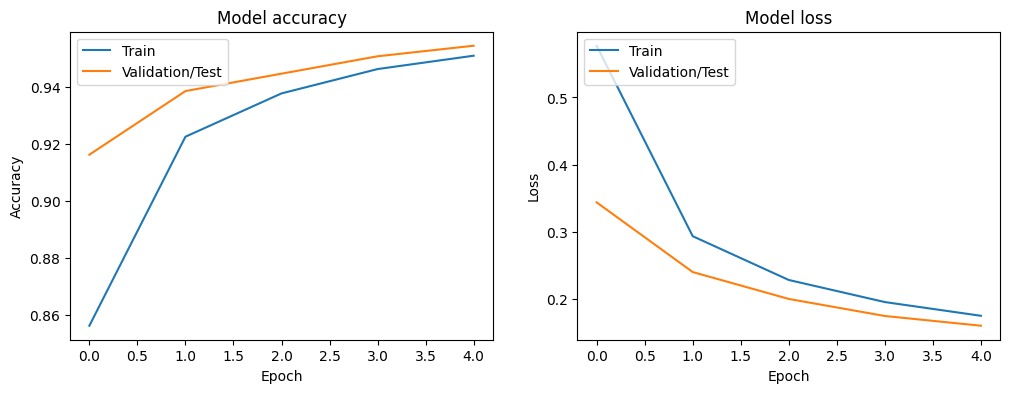

In [98]:
import matplotlib.pyplot as plt



# plot training & validation accuracy and loss values

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = "Train Accuracy")
plt.plot(history.history['val_accuracy'], label = "Test Accuracy")
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation/Test'], loc = 'upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = "Train Loss")
plt.plot(history.history['val_loss'], label = "Test Loss")
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation/Test'], loc = 'upper left')

plt.show()